# QC report: HILICpos Rafi only samples (R5pos, R5neg & Naive)
- Minghao Gong; 07/27/2022
- This notebook specifically fits Asari run

# Load libraries

In [2]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [3]:
#load libraries 
shhh <- suppressPackageStartupMessages # It's a library, so shhh!
shhh(library(FactoMineR))
shhh(library(factoextra))
shhh(library(reshape2))
shhh(library(tidyverse))
shhh(library(RColorBrewer))
shhh(library(gridExtra))
shhh(library(pheatmap))
library(repr)#jupyter notebook R ; image manipulation 
#shhh(library(devtools))
#install_github("vqv/ggbiplot")
shhh(library(ggbiplot))
options(warn=-1)#dont show warnings in Output 
options(digits = 14) # Or any higher number; fixing decimal places

library("rjson")

source('./utilis/utlis_MQC.R')

# Read tables

## load Metadata & feature table
- Here first use the peak Area table

# !!! What meta/feature/filtered tables in use?
- HILICpos

In [4]:
meta_path <- "../../input/sequence_file/clean_meta_df.csv"
featab_path <- "../../input/HILICpos_mzML/asari_project_output_727153535/preferred_Feature_table.tsv"
# filtered_featab_path <- "../../output/asari_prep_HILICpos_10//blankM_groupFil0.4_HILICpos_featab.csv"

#### Read metadata table

In [5]:
# metadata information
meta_df <- read_csv(meta_path)

Rows: 24 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): tID, Sample ID, tID_dedup, class

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(meta_df)

tID,Sample ID,tID_dedup,class
<chr>,<chr>,<chr>,<chr>
nist_2,nist_2,nist_2,nist
nist_4,nist_4,nist_4,nist
nist_6,nist_6,nist_6,nist
q3June2014_1b,q3June2014_1b_2,q3June2014_1,q3June2014
q3June2014_1b,q3June2014_1b_4,q3June2014_1,q3June2014
q3June2014_1b,q3June2014_1b_6,q3June2014_1,q3June2014


#### Read in the feature table
- Of note, since it is using tibble, row.names are suppressed; `COMP ID` comes as the first columns

In [7]:
asari_df <- read_delim(featab_path,delim = '\t')

Rows: 9431 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): id_number
dbl (34): mz, rtime, rtime_left_base, rtime_right_base, parent_masstrack_id,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
asari2data_feat_df_regExpr <- function(asari_df,regExpr_sample_cols) {
    sample_col_index = grep(regExpr_sample_cols,colnames(asari_df))
    featab_df = asari_df[,c(1,sample_col_index)]
    return(featab_df)
}

asari2data_feat_df_index <- function(asari_df,end_index = 11) {
    featab_df = asari_df[,c(1,end_index:ncol(asari_df))]
    return(featab_df)
}

In [9]:
featab_df = asari2data_feat_df_regExpr(asari_df,"Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]")

In [10]:
dim(featab_df)

[1] 9431   13

In [11]:
head(featab_df) # examine the table

id_number,G1_Naive_1_300_2,G1_Naive_2_300_2,G1_Naive_3_300_2,G2_R5pos_1_142_2,G2_R5pos_2_200_2,G2_R5pos_3_150_2,G3_R5neg_1a_655_2,G3_R5neg_1b_655_2,G3_R5neg_2a_687_2,G3_R5neg_2b_687_2,G3_R5neg_3a_865_2,G3_R5neg_3b_865_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,27701,94249,89481,0,43734,22457,106522,117992,132798,117319,132436,103354
F4,18042890,23587830,23522578,12798823,15422758,17903307,37784533,38169479,31623646,31050101,43125736,40203363
F5,0,0,0,0,0,0,0,0,0,0,0,0
F6,0,0,0,0,0,0,0,0,0,0,0,0
F9,495727,0,376749,0,350334,0,0,0,0,0,338732,0
F18,0,0,0,0,0,0,0,0,0,0,0,0


### subset metadatabased on feature table

In [30]:
colnames(featab_df)

[1] "id_number"         "G1_Naive_1_300_2"  "G1_Naive_2_300_2" 
 [4] "G1_Naive_3_300_2"  "G2_R5pos_1_142_2"  "G2_R5pos_2_200_2" 
 [7] "G2_R5pos_3_150_2"  "G3_R5neg_1a_655_2" "G3_R5neg_1b_655_2"
[10] "G3_R5neg_2a_687_2" "G3_R5neg_2b_687_2" "G3_R5neg_3a_865_2"
[13] "G3_R5neg_3b_865_2"

In [44]:
pull(meta_df['Sample ID']) # tibble column needs to pull out into vector

[1] "G2_R5pos_1_142_2"  "G2_R5pos_2_200_2"  "G2_R5pos_3_150_2" 
 [4] "G1_Naive_1_300_2"  "G1_Naive_2_300_2"  "G1_Naive_3_300_2" 
 [7] "G3_R5neg_1a_655_2" "G3_R5neg_1b_655_2" "G3_R5neg_2a_687_2"
[10] "G3_R5neg_2b_687_2" "G3_R5neg_3a_865_2" "G3_R5neg_3b_865_2"

In [45]:
meta_df = meta_df[pull(meta_df['Sample ID']) %in% colnames(featab_df),]

#### procedure for preoprocessing of data
- log2-transformation (currently the missing data is denoted by NA)
- Analysis the TIC
- Correlation heatmap

In [46]:
log2transform <- function(featab_df) {
    featab_df[featab_df == 0] = NA
    featab_df.log <- cbind(featab_df[,1],log2(featab_df[, 2:ncol(featab_df)])) # no need to add +1
    # featab_df.log[is.na(featab_df.log)] = 0
    return(featab_df.log)
}

In [47]:
# separate the annotation and feature values part and do log2 conversion
featab_df.log <- log2transform(featab_df) # no need to add +1
head(featab_df.log)

,id_number,G1_Naive_1_300_2,G1_Naive_2_300_2,G1_Naive_3_300_2,G2_R5pos_1_142_2,G2_R5pos_2_200_2,G2_R5pos_3_150_2,G3_R5neg_1a_655_2,G3_R5neg_1b_655_2,G3_R5neg_2a_687_2,G3_R5neg_2b_687_2,G3_R5neg_3a_865_2,G3_R5neg_3b_865_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F1,14.757650437737,16.524189690740,16.449293758957,NA,15.416467685806,14.454877592497,16.700791895621,16.848329520875,17.018873893623,16.840077153498,17.014935816837,16.657234699373
2,F4,24.104927103400,24.491539365865,24.487542847855,23.60950780802,23.878557444843,24.093722762977,25.171292456047,25.185916158618,24.914500374820,24.888094625474,25.362045742775,25.260812851698
3,F5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,F6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,F9,18.919186312437,NA,18.523244156938,NA,18.418371483276,NA,NA,NA,NA,NA,18.369784759056,NA
6,F18,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [48]:
dim(featab_df.log)

[1] 9431   13

### Overall Density Distribution of data 
  

- first two columns are gona be mz and rt and rest should be the samples ; nothing else 

- two parameters needed : 
  - data : - Data can be log2(prefferably) /linear; if have nas will be imputed to calulate density
  
  - y_lim_param; to adjust height of y axis(desnity) in the plot; later to automate it may be 
  

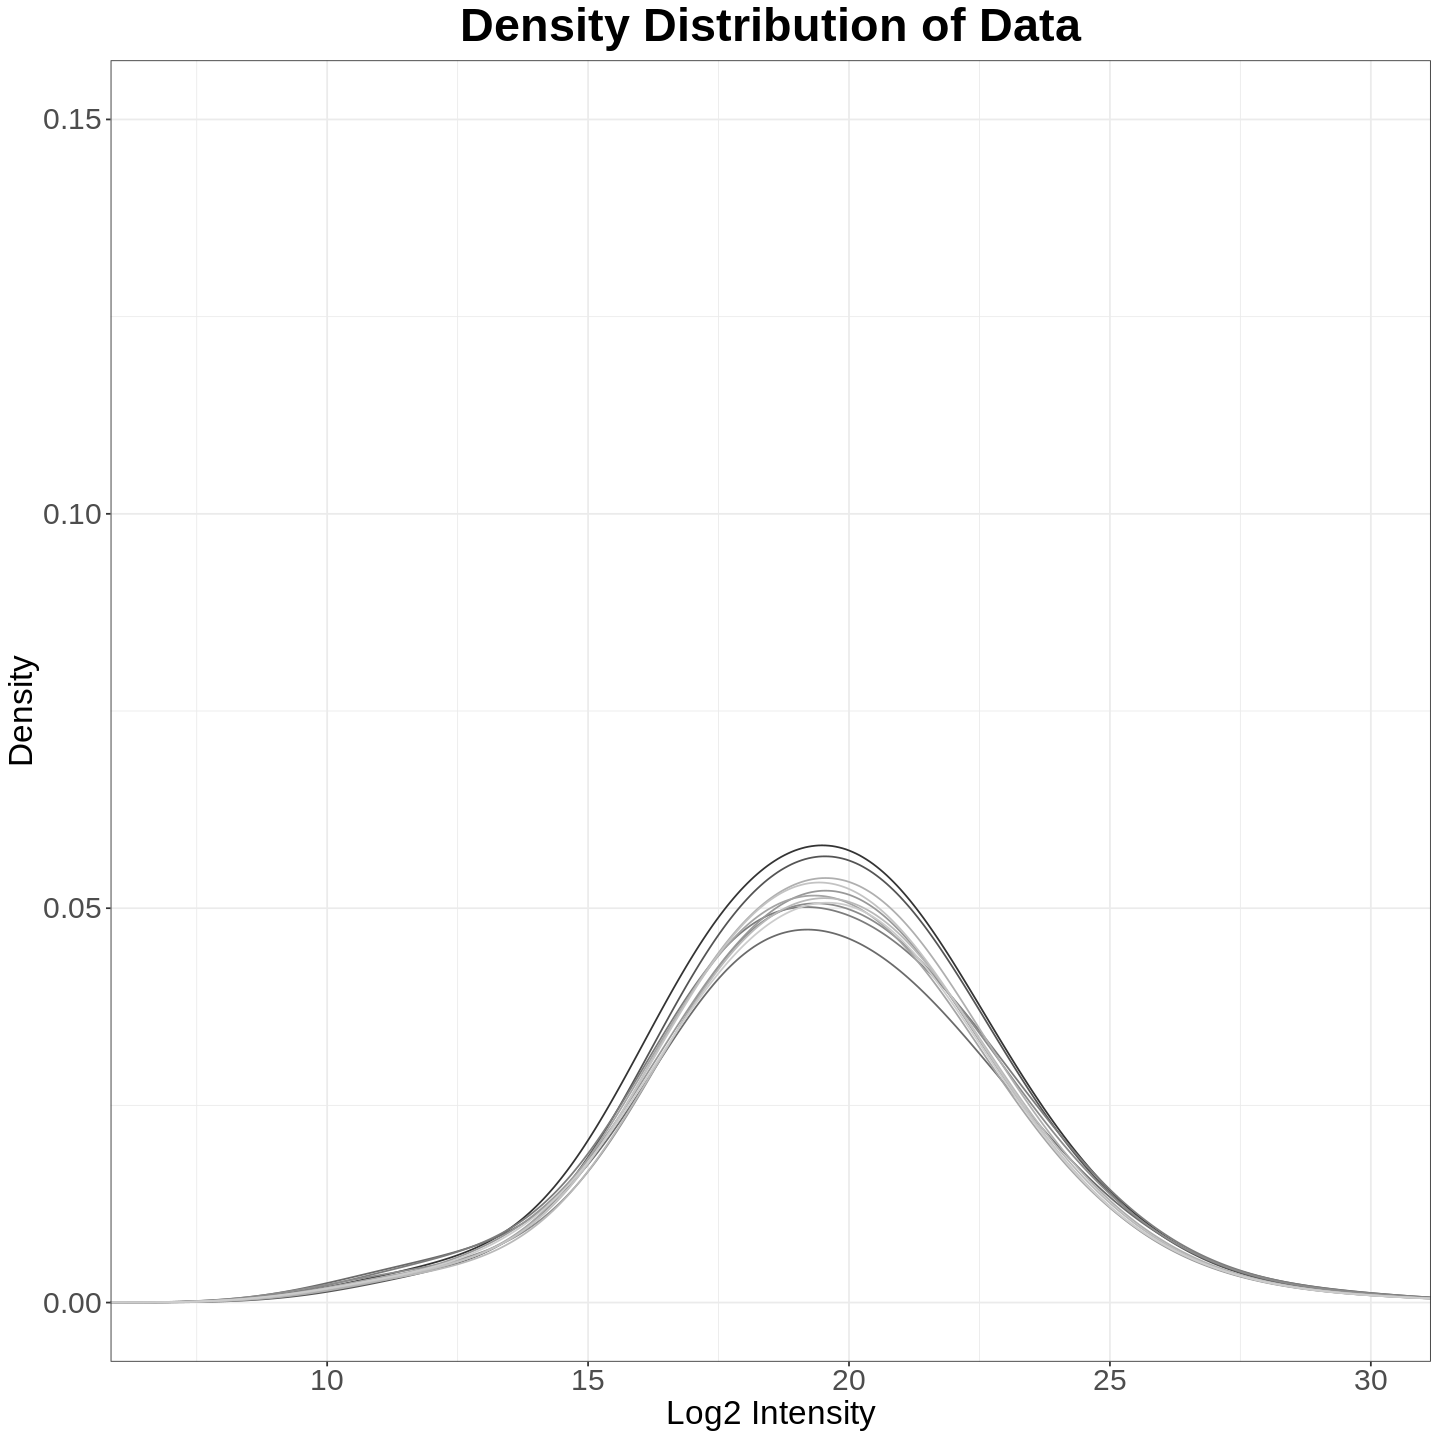

In [49]:
options(repr.plot.width=12, repr.plot.height=12, res=200)
suppressMessages(custom_density_plot(featab_df.log[,2:ncol(featab_df.log)], 
                                     y_lim_param=0.15))

### Mean TIC ACross Samples 

Input:

- data ; if nas ; willl be imputed for 0s within the function because we need to take into account the missing values in each sample to properly detect low intensity samples 
- optional ; metadata ; if present will factor color it ; if not then will not 


Note ; if x-axis need be changed for fontsize ; use   axis.title.x = element_text( size=16) in plotMeanTic function to control;

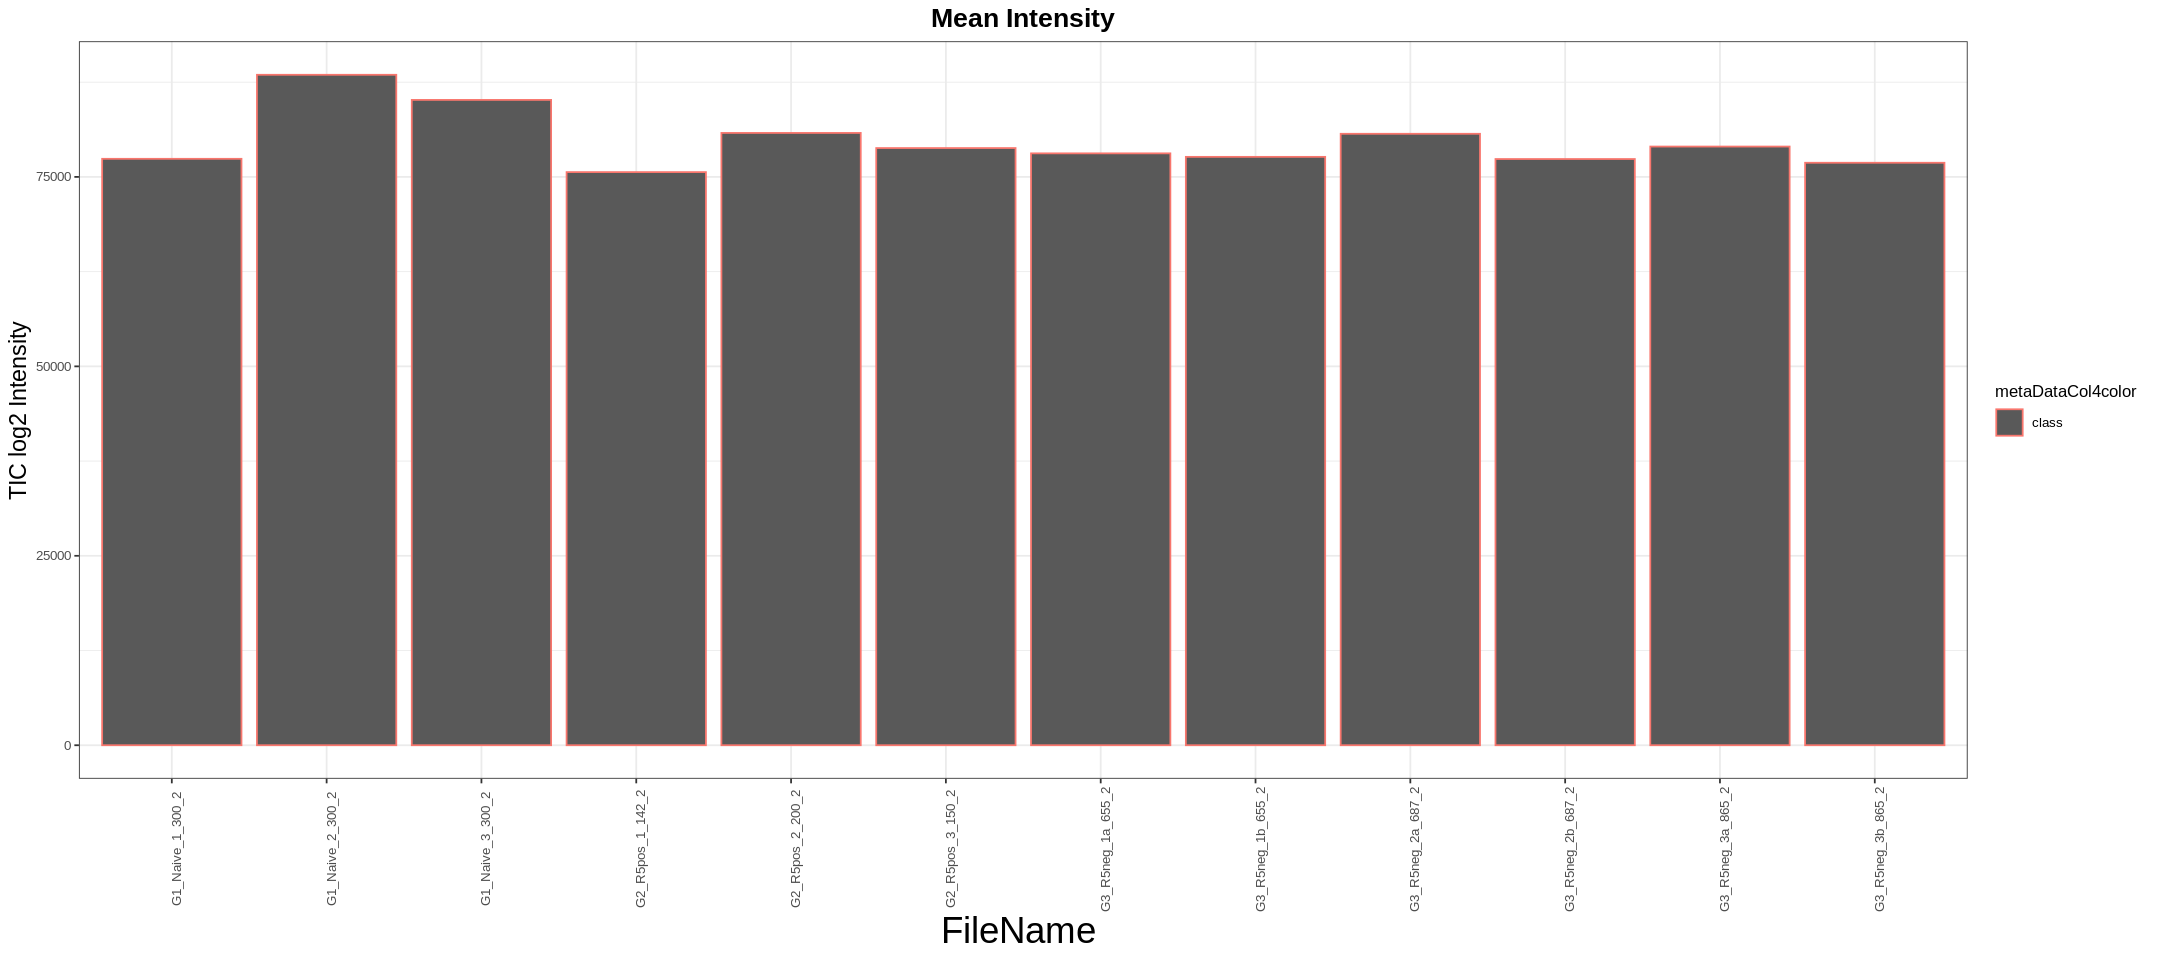

In [50]:
options(repr.plot.width=18, repr.plot.height=8, res=200)
suppressMessages(plotTIC(featab_df.log,meta_df,"tID","class"))
#control xaxis font size;axis.title.x = element_text( size=16)

## Decide SD cutoff for outliers by yourself if need be

In [51]:
get_TIC_outliers(featab_df.log,2)

columnsum,Sample.ID
<dbl>,<chr>


### Missing values plot 

Input:

- logged 2/linear scale  data with nas ; no imputation happening in the function as i am counting Nas 


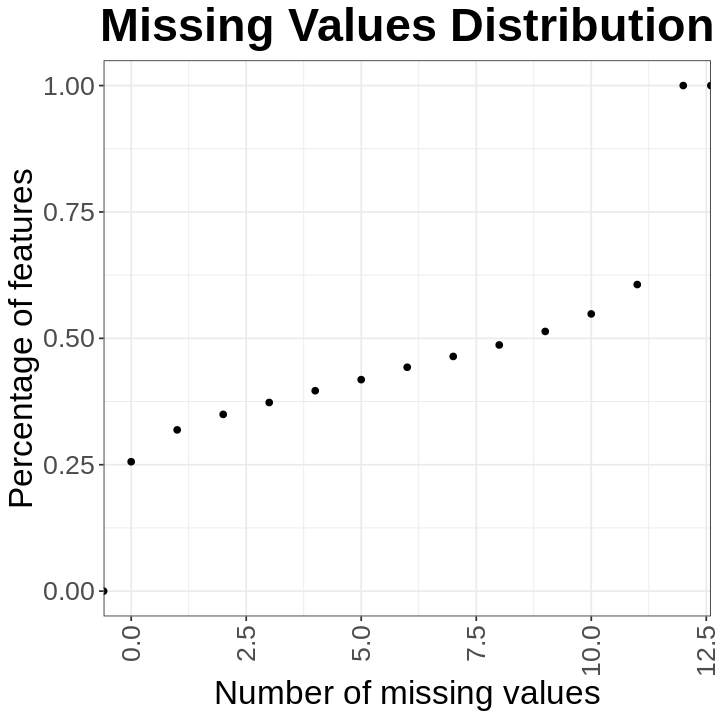

In [52]:
source('./utilis/utlis_MQC.R')
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = FALSE)

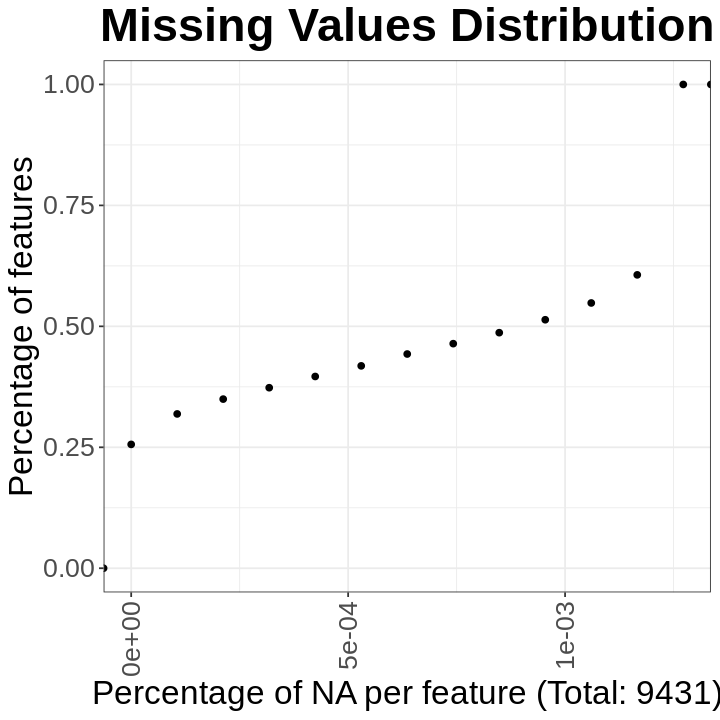

In [53]:
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = TRUE)

### Corelation bw samples 

In [54]:
# A function that help later step as correlation plot cannot handle very well with zero values
mssingValueAsNA <- TRUE # NA is good to skip this step
if (!mssingValueAsNA) {
    featab_df.log.NA <- featab_df.log
    featab_df.log.NA[featab_df.log == 0] <- NA  # Turn 0 into NA
    featab_df.log <- featab_df.log.NA
}

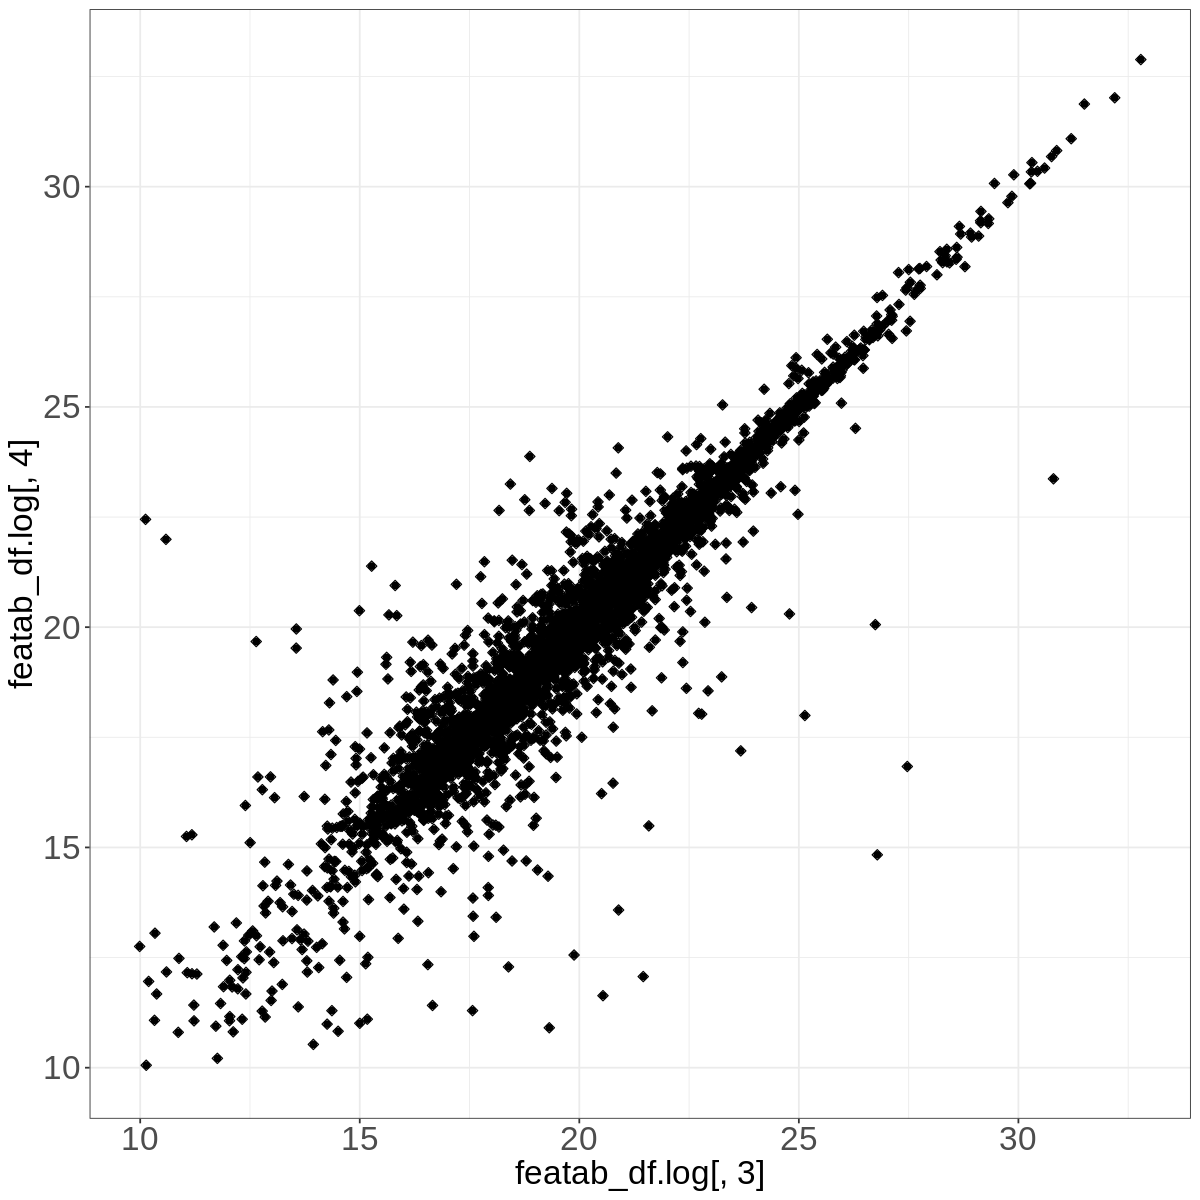

In [56]:
#options(repr.plot.width=16, repr.plot.height=20, res=200)
# reproducibility of injection replicates
#figure options ; change to the needs
options(repr.plot.width=10, repr.plot.height=10)
  ggplot(featab_df.log, aes(x=featab_df.log[,3], y=featab_df.log[,4])) + geom_point()+
  geom_point(size=2, shape=23) +# Change the point size, and shape
  theme_bw()+#axis settings 
    theme(axis.text=element_text(size=20))+
 #axis labels settings 
    theme(axis.title=element_text(size=20))

## Heatmap 

Input: 
- data; log2/linear scale data with nas 
- metadata is optional 
- metadata include what to colors.

WishList Note:  fix if metadata is not passed; debug

In [57]:
colnames(meta_df)

[1] "tID"       "Sample ID" "tID_dedup" "class"

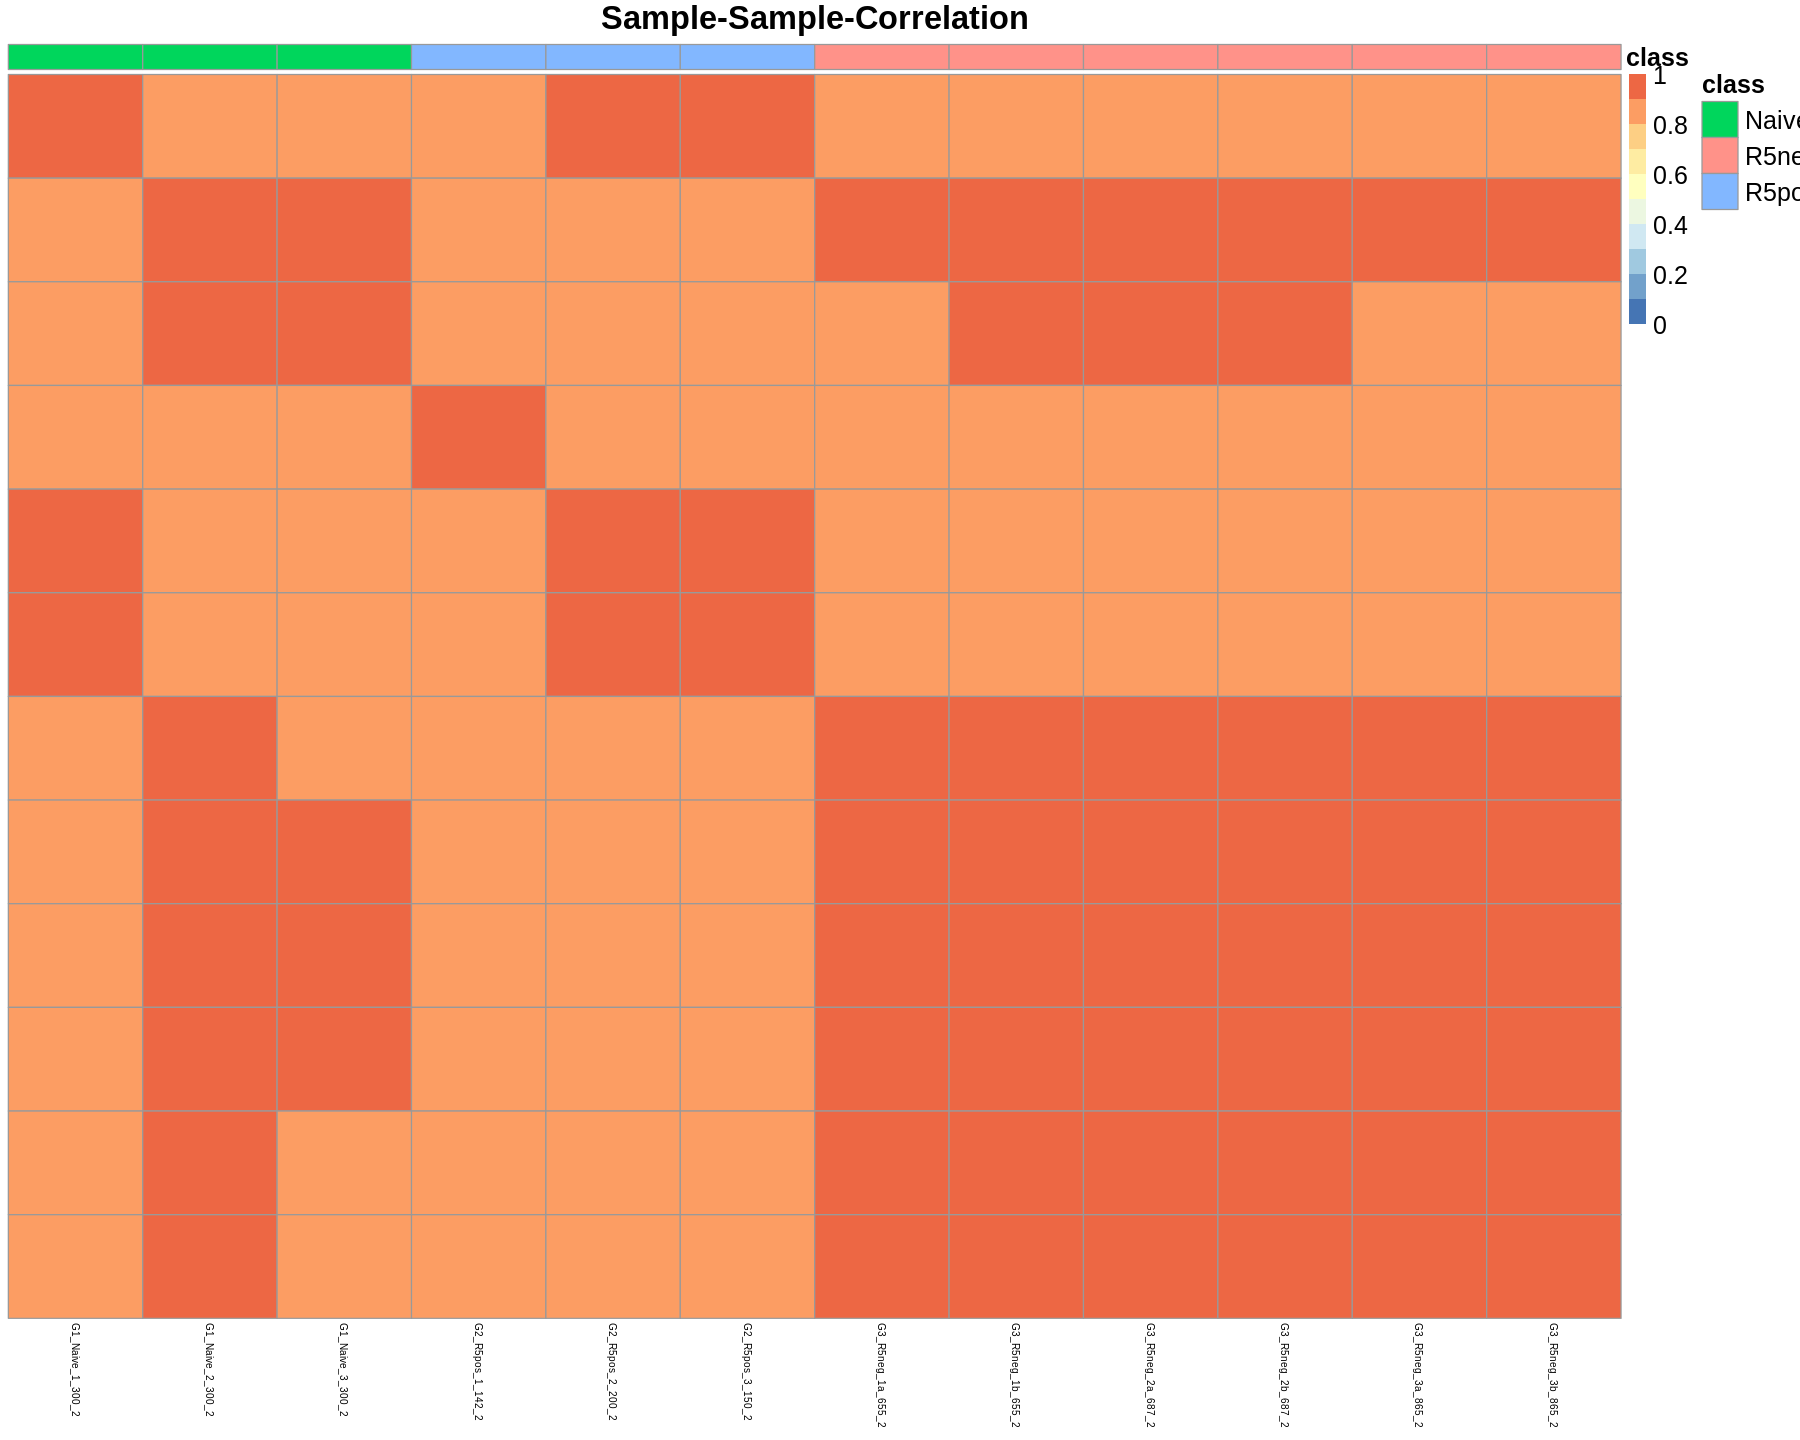

In [61]:
options(repr.plot.width=15, repr.plot.height=12, res=300)
suppressMessages(plot_heatmap(featab_df.log, meta_df, "Sample ID","class"))

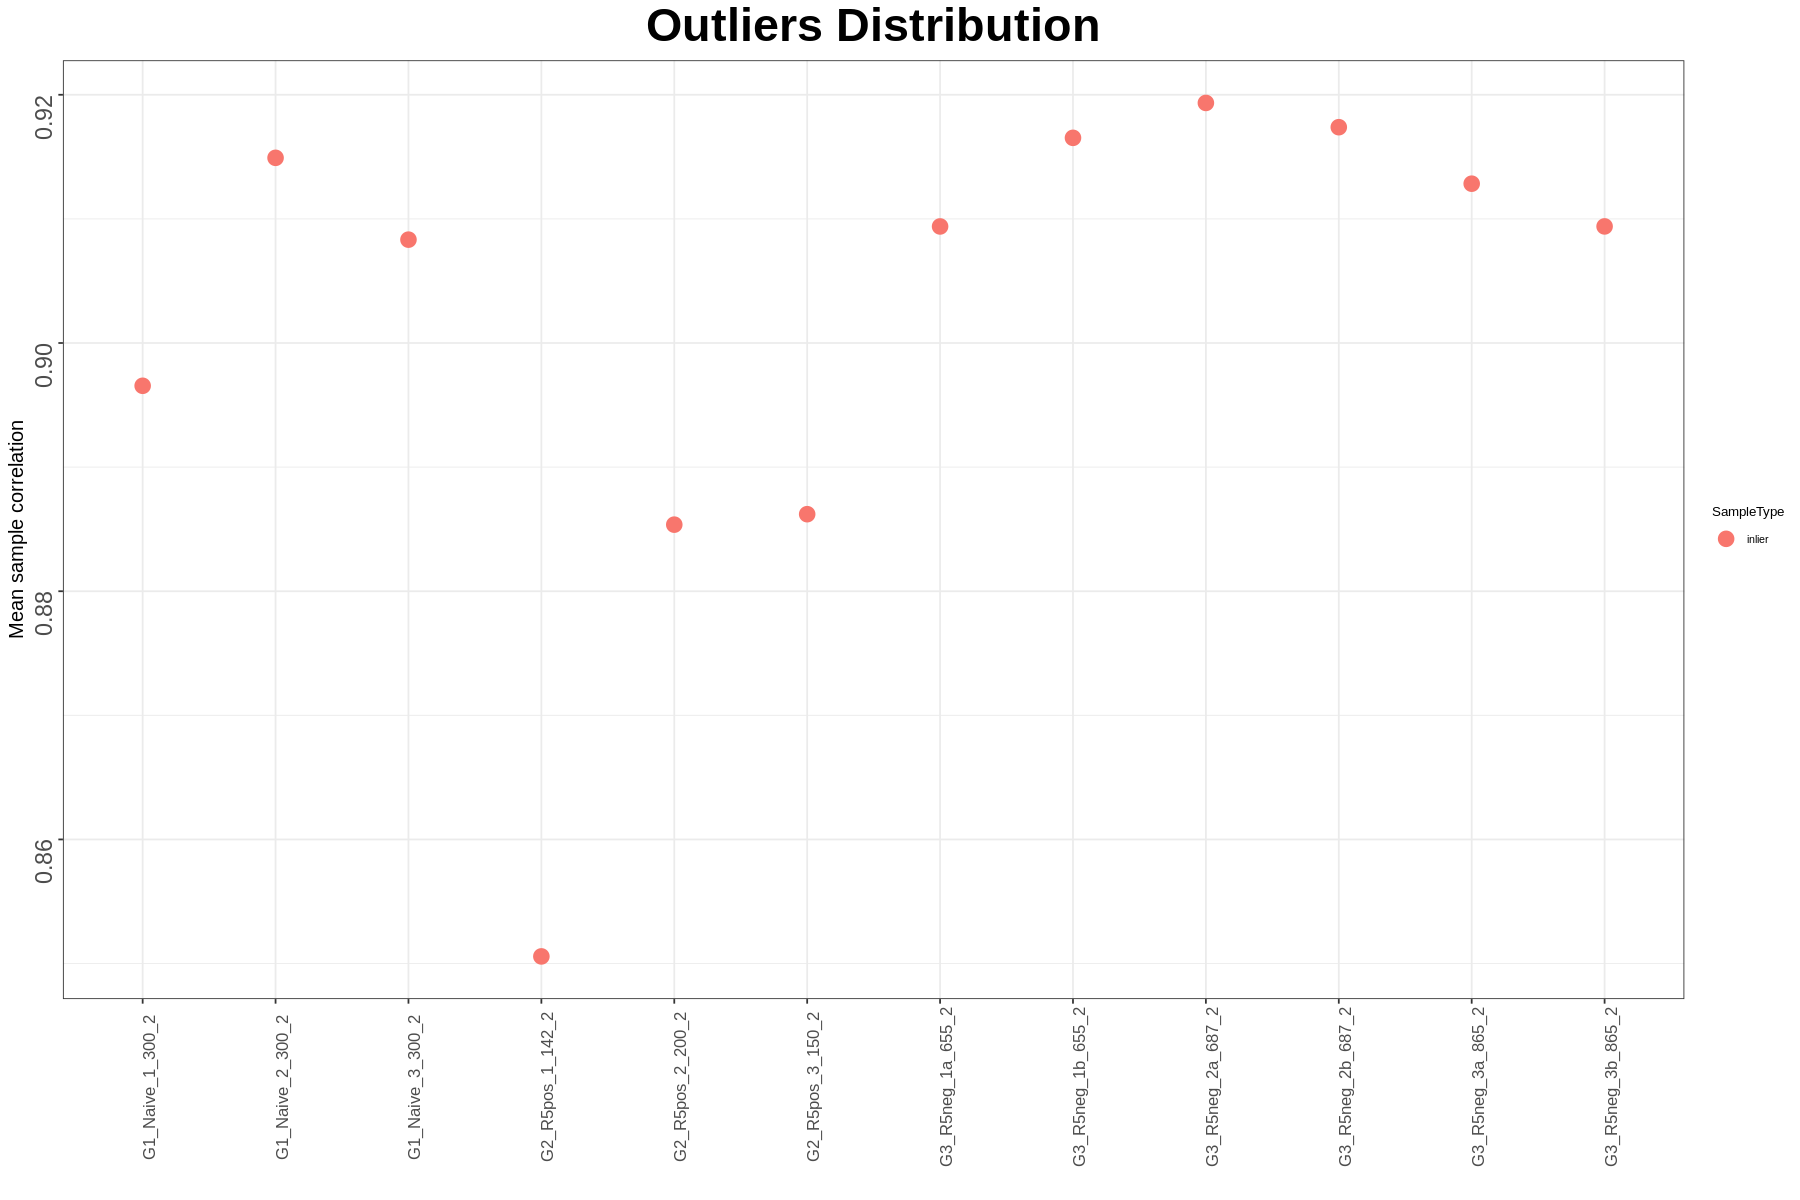

In [63]:
df.outliers <-  get_outliers_heatmap(featab_df.log)
options(repr.plot.width=15, repr.plot.height=10, res=300)
getoutliersplot(df.outliers)

In [64]:
filtered.df.outliers<-df.outliers %>% filter(SampleType=="outlier")
filtered.df.outliers

samples,columnmeancor,SampleType
<chr>,<dbl>,<chr>


# PCA

## Here if I use the unfiltered data

Joining, by = "Sample ID"
Too few points to calculate an ellipse

Too few points to calculate an ellipse



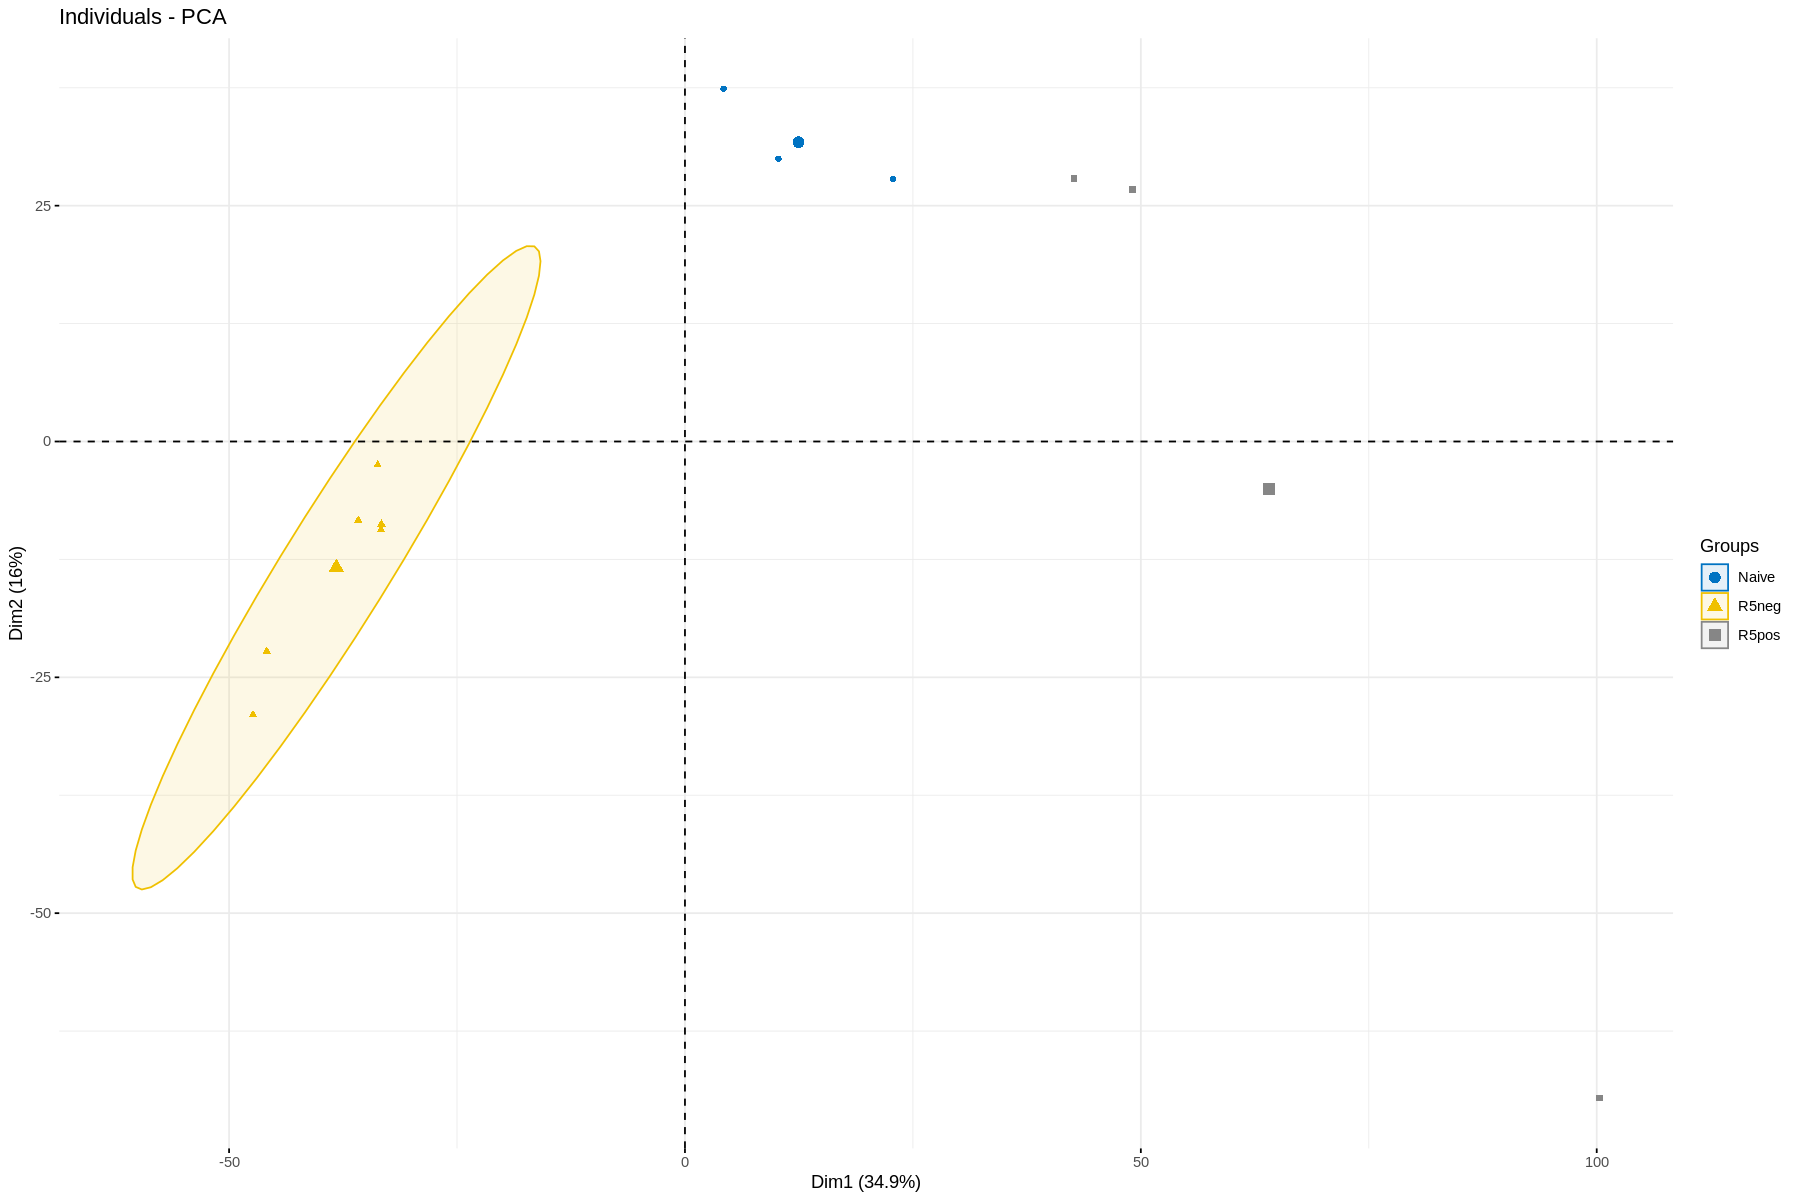

In [65]:
plotPCA(featab_df.log, meta_df, "Sample ID", "class", TRUE)

## Here I will use the filtered

In [61]:
# filt_df <- read_csv(filtered_featab_path)

# filt_df = asari2data_feat_df(filt_df,'HEU\\_[0-9]+|HUU\\_[0-9]+')
# filt_df.log2 = log2transform(filt_df)

# ----

# colnames(meta_df)

# plotPCA(filt_df.log2, meta_df, "Sample.ID", "Group", TRUE)

------------

-----